# Day 14 Statistics Part 4
9 April 2025

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")
df.head()

# Null Hypothesis (H₀): 
There is no difference in survival rates between males and females (survival is independent of gender).

# Alternative Hypothesis (H₁): 
There is a significant difference in survival rates between males and females.

# Appropriate Test: 
Chi-square test of independence

In [21]:
from scipy.stats import shapiro

Text(0.5, 1.0, 'Age Distribution')

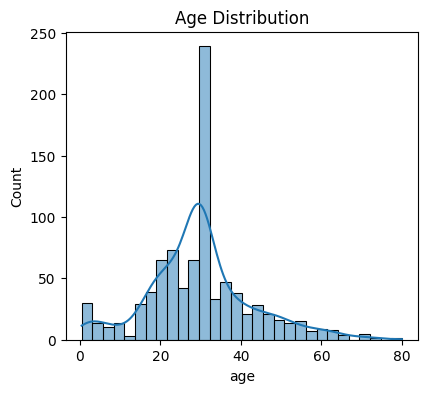

In [102]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=age, kde=True)
plt.title("Age Distribution")

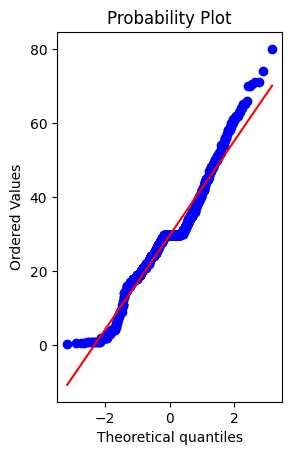

In [128]:
plt.subplot(1, 2, 2)
from scipy.stats import probplot
probplot(age, plot=plt)
plt.show()

In [136]:
shapiro_test = shapiro(age)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test[0]}")
print(f"P-value: {shapiro_test[1]}")
alpha = 0.05  # Significance level
if shapiro_test[1] > alpha:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")



Shapiro-Wilk Test Statistic: 0.9748582563729324
P-value: 0.9331651921064946
Data is normally distributed (fail to reject H0)


In [142]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['age'],df['fare'])
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
alpha = 0.05  # Significance level
if p_value > alpha:
    print(f"Fail to reject H₀. ")
else:
    print(f"Reject H₀ in favor of H₁.")

T-statistic: -1.456, P-value: 0.146
Fail to reject H₀. 


# Task 3 

## Step 1-2:Import titanic and Make a Simple Table (Contingency Table)

In [144]:
# Create a survival vs gender table
survival_table = pd.crosstab(df['sex'], df['survived'])
print(survival_table)

survived    0    1
sex               
female     81  233
male      468  109


## Step 3: Visualize with a Bar Chart

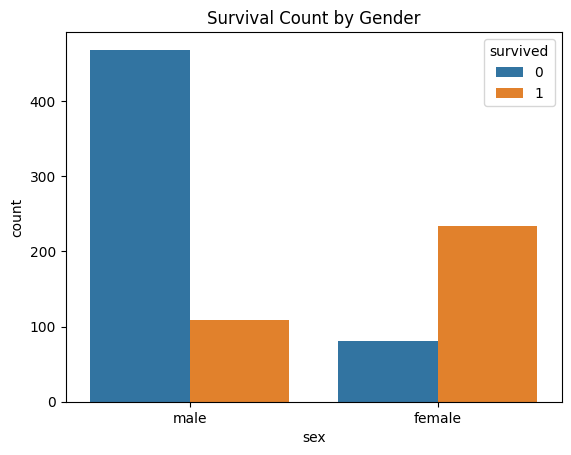

In [146]:
sns.countplot(x='sex',hue='survived',data=df )
plt.title("Survival Count by Gender")
plt.show()

## Step 4: Calculate Correlation (Phi Coefficient)

In [148]:
from scipy.stats import chi2_contingency

# Run the chi-square test
chi2, p_value, _, _ = chi2_contingency(survival_table)

# Calculate phi coefficient
n = len(df)
phi = (chi2/n)**0.5

print(f"Phi Coefficient: {phi:.3f}")
print(f"P-value: {p_value:.4f}")

Phi Coefficient: 0.541
P-value: 0.0000


In [149]:
from scipy.stats import chisquare

# Observed frequencies (what you measured)
observed = [22, 17, 15, 20, 16, 10]  # e.g., dice rolls for numbers 1-6

# Expected frequencies (what you expect if fair)
expected = [sum(observed)/6] * 6  # Equal probability for 6-sided die

# Perform the test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi2 Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value > alpha:
    print("Fail to reject null hypothesis - die may be fair")
else:
    print("Reject null hypothesis - die appears unfair")

Chi2 Statistic: 5.240
P-value: 0.387
Fail to reject null hypothesis - die may be fair
